In [1]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
setwd('/home/data/t060324/jobs/aimin/')
source('./code/function/0.functions.R')

In [2]:
##loading module results & select prognostic-associated modules
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')

In [4]:
all_signiff_modules_fisher

[1] "c1_3"   "c1_7"   "c1_14"  "c1_53"  "c1_105" "c1_111" "c1_112" "c1_159"
 [9] "c1_380" "c1_429" "c1_557" "c1_564" "c1_609" "c1_8"   "c1_122" "c1_134"
[17] "c1_567" "c1_585" "c1_587" "c1_10"  "c1_121" "c1_123" "c1_364" "c1_574"
[25] "c1_578" "c1_581" "c1_769"

In [5]:
## genes from prognostic-associated modules
ALLnode_select_TCGA_MEGENA <- readRDS(file='/home/data/t060324/jobs/aimin/output/MEGENA/ALLnode_select_TCGA_MEGENA.RDS')

In [6]:
library(clusterProfiler)
library(org.Hs.eg.db)



clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

## Functional enrichment of key parent modules

In [8]:
library(AnnotationDbi)
module_gene_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]
module_gene_listID_sub <- lapply(c('c1_10','c1_105','c1_364','c1_7','c1_53','c1_769','c1_14','c1_429','c1_3','c1_8'),function(x){
    print(x)
    geneID.table=unique(mapIds(org.Hs.eg.db,keys=module_gene_list[[x]],column='ENTREZID', keytype='SYMBOL',multiVals="first"))
})
names(module_gene_listID_sub) <- c('c1_10','c1_105','c1_364','c1_7','c1_53','c1_769','c1_14','c1_429','c1_3','c1_8')
names(module_gene_listID_sub) <- gsub(pattern = 'c1_',replacement = 'M',x = names(module_gene_listID_sub))

[1] "c1_10"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_105"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_364"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_7"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_53"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_769"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_14"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_429"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_3"


'select()' returned 1:1 mapping between keys and columns



[1] "c1_8"


'select()' returned 1:1 mapping between keys and columns



In [9]:
library(ReactomePA)
library(KEGG.db)

ReactomePA v1.42.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use ReactomePA in published research, please cite:
Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for reactome pathway analysis and visualization. Molecular BioSystems 2016, 12(2):477-479


KEGG.db contains mappings based on older data because the original
  resource was removed from the the public domain before the most
  recent update was produced. This package should now be considered
  deprecated and future versions of Bioconductor may not have it
  available.  Users who want more current data are encouraged to look
  at the KEGGREST or reactome.db packages


Warning message:
“Package 'KEGG.db' is deprecated and will be removed from Bioconductor
  version 3.12”


In [10]:
compareER_ReactomePA <- compareCluster(module_gene_listID_sub,fun = 'enrichPathway',organism = "human",minGSSize = 10)
compareER_KEGG <- compareCluster(module_gene_listID_sub,fun = 'enrichKEGG',keyType='kegg',organism="hsa",pvalueCutoff=0.05,minGSSize = 10,use_internal_data =T)
compareER_GOBP <- compareCluster(module_gene_listID_sub,fun = 'enrichGO',OrgDb= org.Hs.eg.db,ont = "BP",pvalueCutoff=0.001)

In [11]:
saveRDS(list(Reactome=compareER_ReactomePA,KEGG=compareER_KEGG,BP=compareER_GOBP),file = './output/bulk/section_1/2.modules_enrichment_results.RDS')

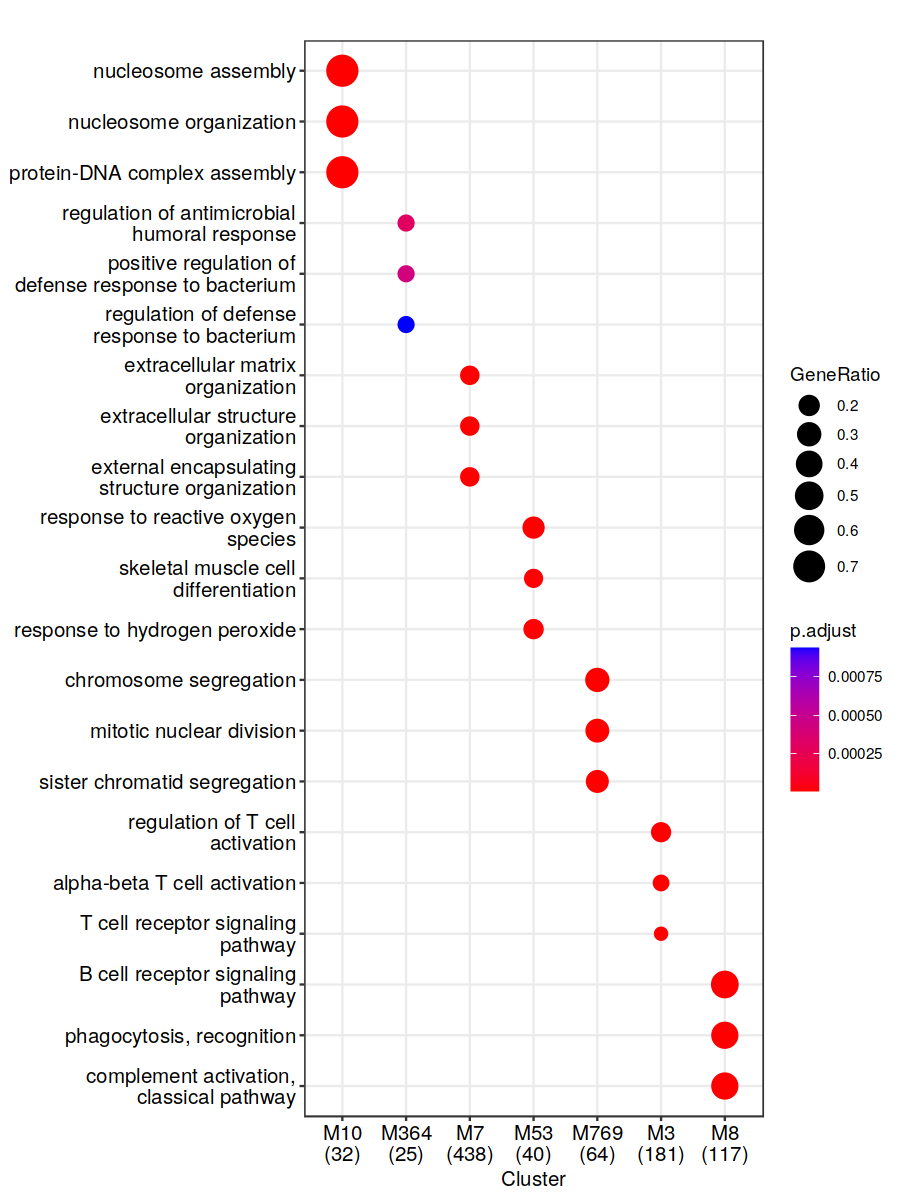

In [20]:
options(repr.plot.height = 10, repr.plot.width = 7.5)
dotplot(compareER_GOBP,showCategory = 3)

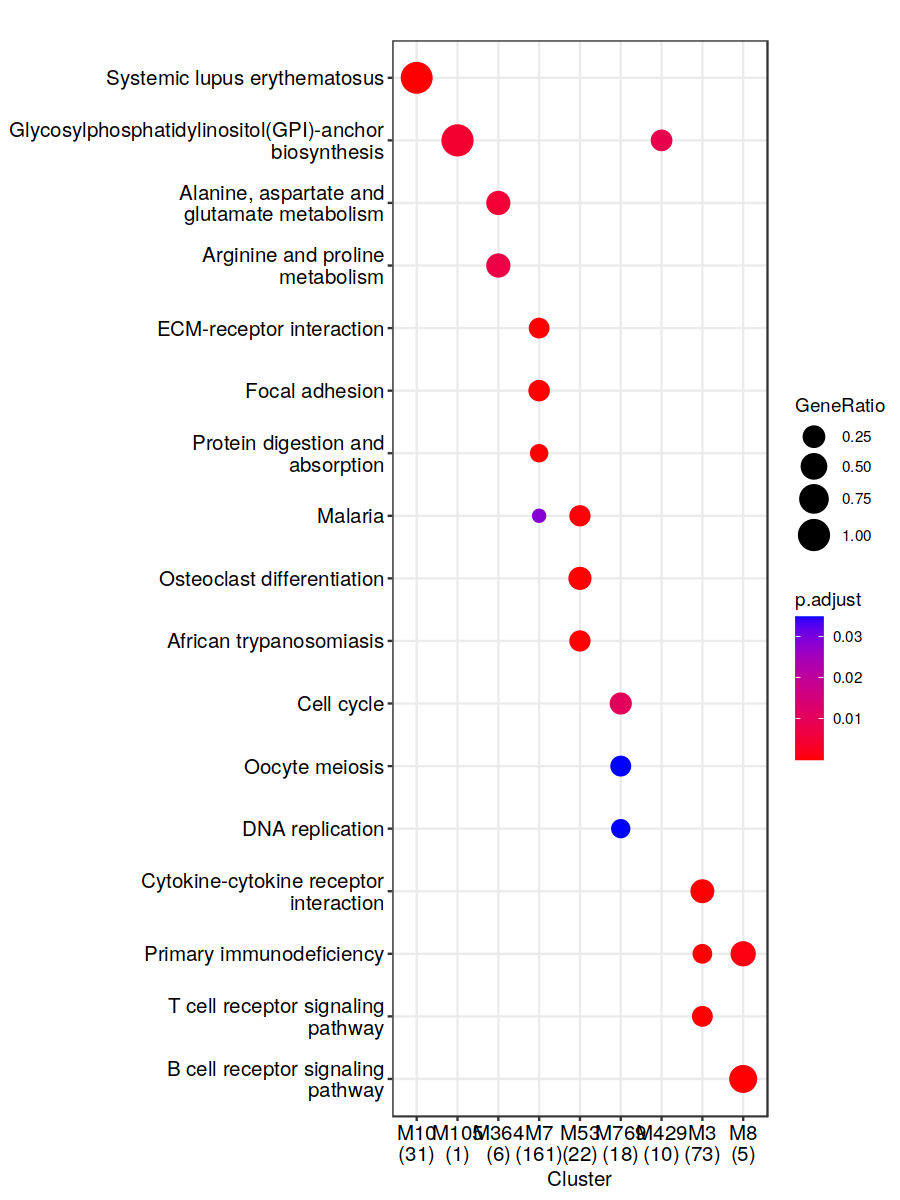

In [21]:
options(repr.plot.height = 10, repr.plot.width = 7.5)
dotplot(compareER_KEGG,showCategory = 3)

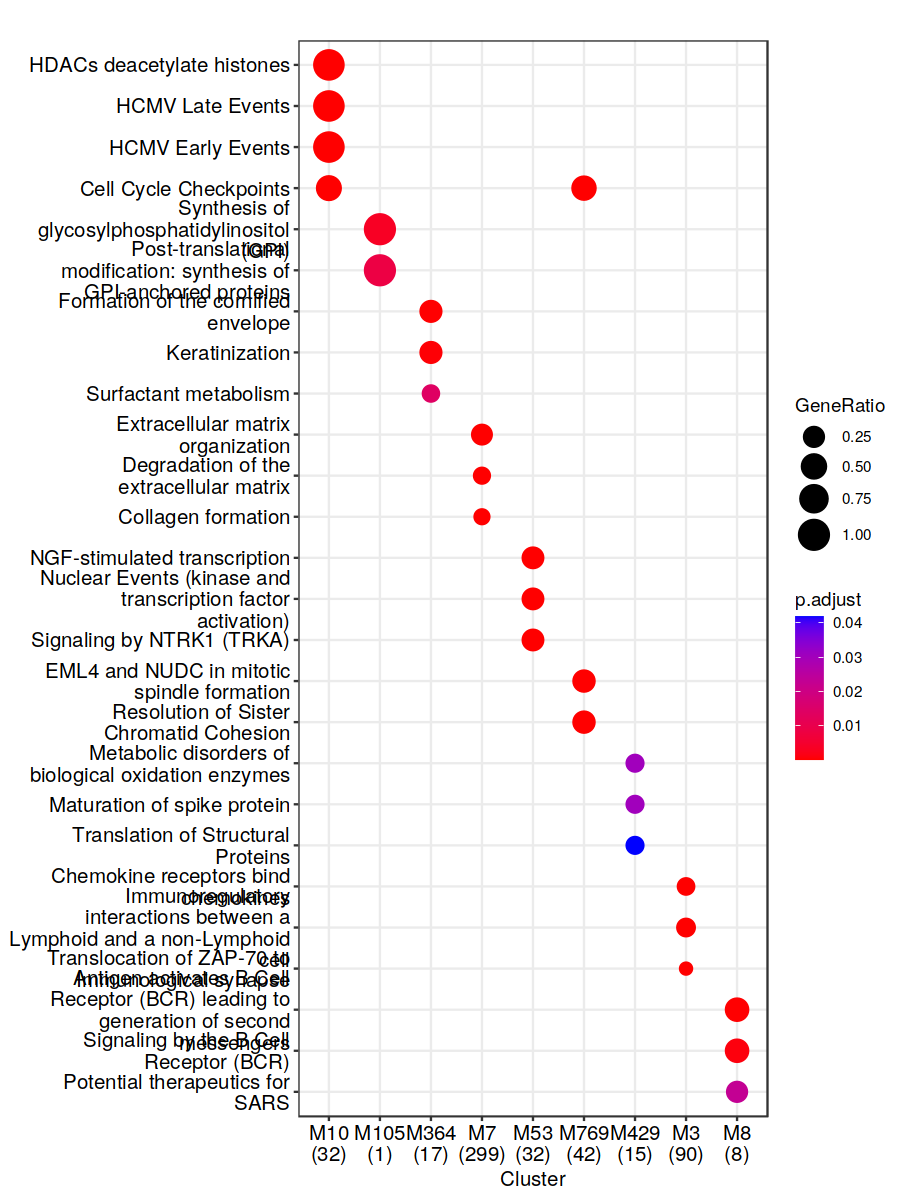

In [22]:
options(repr.plot.height = 10, repr.plot.width = 7.5)
dotplot(compareER_ReactomePA,showCategory = 3)

In [23]:
circle_data_Reactome  <- compareER_ReactomePA@compareClusterResult
circle_data_kegg  <- compareER_KEGG@compareClusterResult
circle_data_GO  <- compareER_GOBP@compareClusterResult

In [24]:
colnames(circle_data_Reactome)[c(1,3)] <- c("genes",'Term')
colnames(circle_data_kegg)[c(1,3)] <- c("genes",'Term')
colnames(circle_data_GO)[c(1,3)] <- c("genes",'Term')

In [62]:
circReactome <- data.frame()
for(i in 1:dim(table(circle_data_Reactome$genes))){

    a <- subset(circle_data_Reactome,genes==names(table(circle_data_Reactome$genes)[i]))
    a <- a[order(a$p.adjust,decreasing = F),]
    circReactome <- rbind(circReactome,a[1:5,])  
}

circ_kegg <- data.frame()
for(i in 1:dim(table(circle_data_kegg$genes))){

    a <- subset(circle_data_kegg,genes==names(table(circle_data_kegg$genes)[i]))
    a <- a[order(a$p.adjust,decreasing = F),]
    circ_kegg <- rbind(circ_kegg,a[1:10,])
    
}

circ_GO <- data.frame()
for(i in 1:dim(table(circle_data_GO$genes))){

    a <- subset(circle_data_GO,genes==names(table(circle_data_GO$genes)[i]))
    a <- a[order(a$p.adjust,decreasing = F),]
    circ_GO <- rbind(circ_GO,a[1:5,])
    
}

In [26]:
library(GOplot)
library(circlize)

Loading required package: ggplot2

Loading required package: ggdendro

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


Loading required package: RColorBrewer

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [34]:
circ_kegg <- circ_kegg[-which(is.na(circ_kegg)),]
chord <- chord_dat(circ_kegg)
chord <- chord[nrow(chord):1,]

In [35]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
module_col <- sample(col_vector, 10)
names(module_col) <- c('M10','M105','M364','M7','M53','M769','M14','M429','M3','M8')

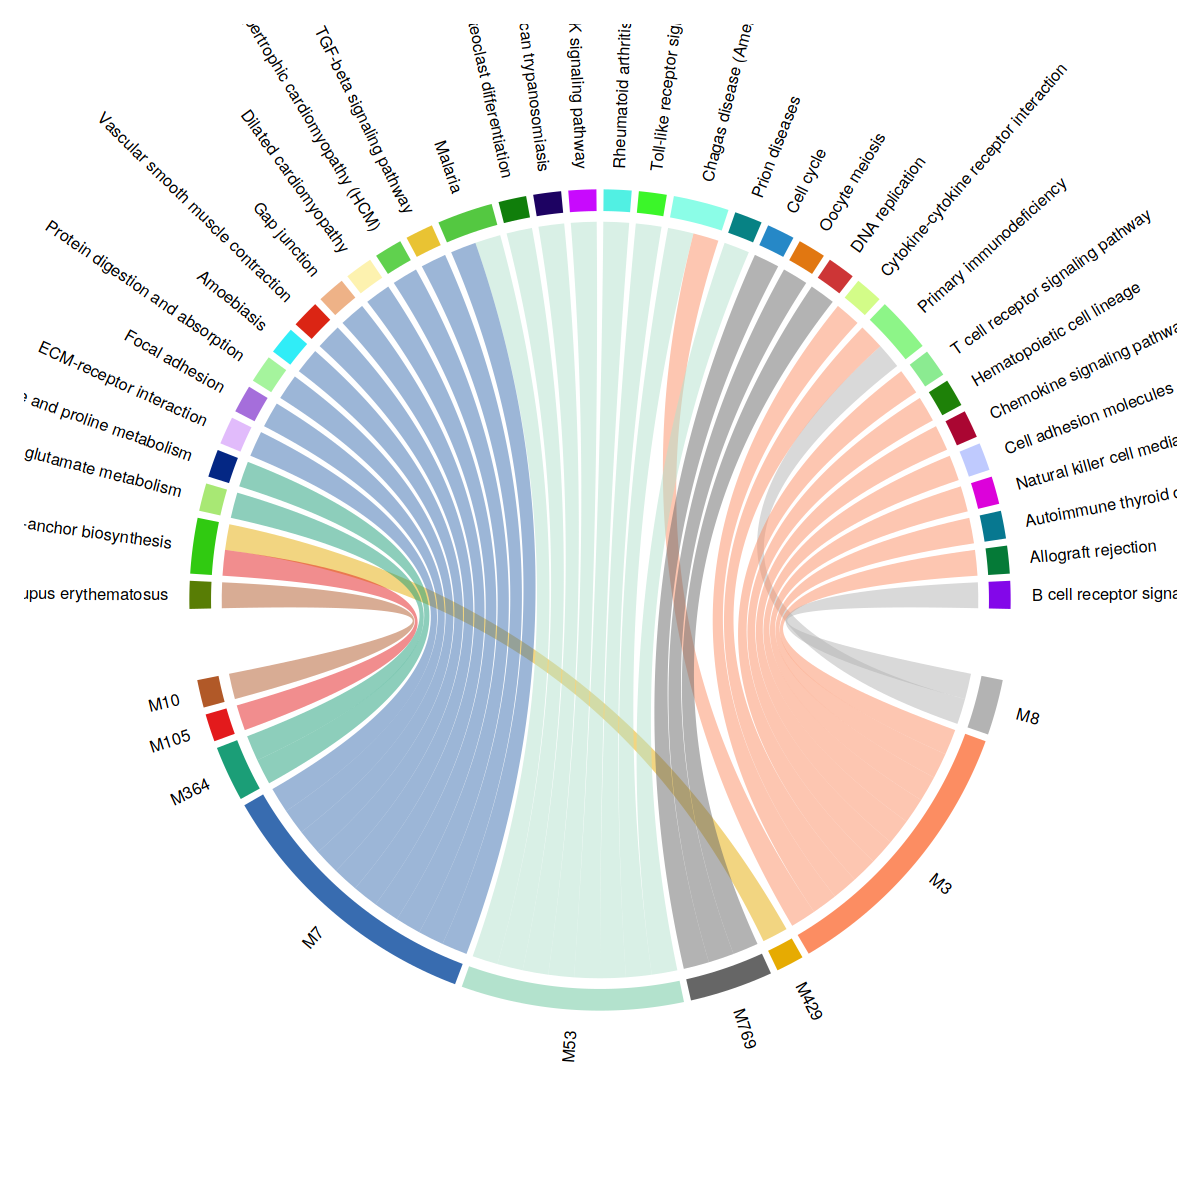

In [36]:
options(repr.plot.height =10, repr.plot.width = 10)

chordDiagram(chord,annotationTrack = "grid",grid.col = module_col, preAllocateTracks = 1)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise",cex = 0.8, niceFacing = TRUE, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.percentage = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)
circos.clear()

In [37]:
pdf(file = './output/bulk/section_1/2.Module_KEGGEnrichMent_circos.pdf',width = 8,height = 8)
chordDiagram(chord,annotationTrack = "grid",grid.col = module_col, preAllocateTracks = 1)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise",cex = 0.8, niceFacing = TRUE, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.percentage = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)
circos.clear()
dev.off()


png 
  2

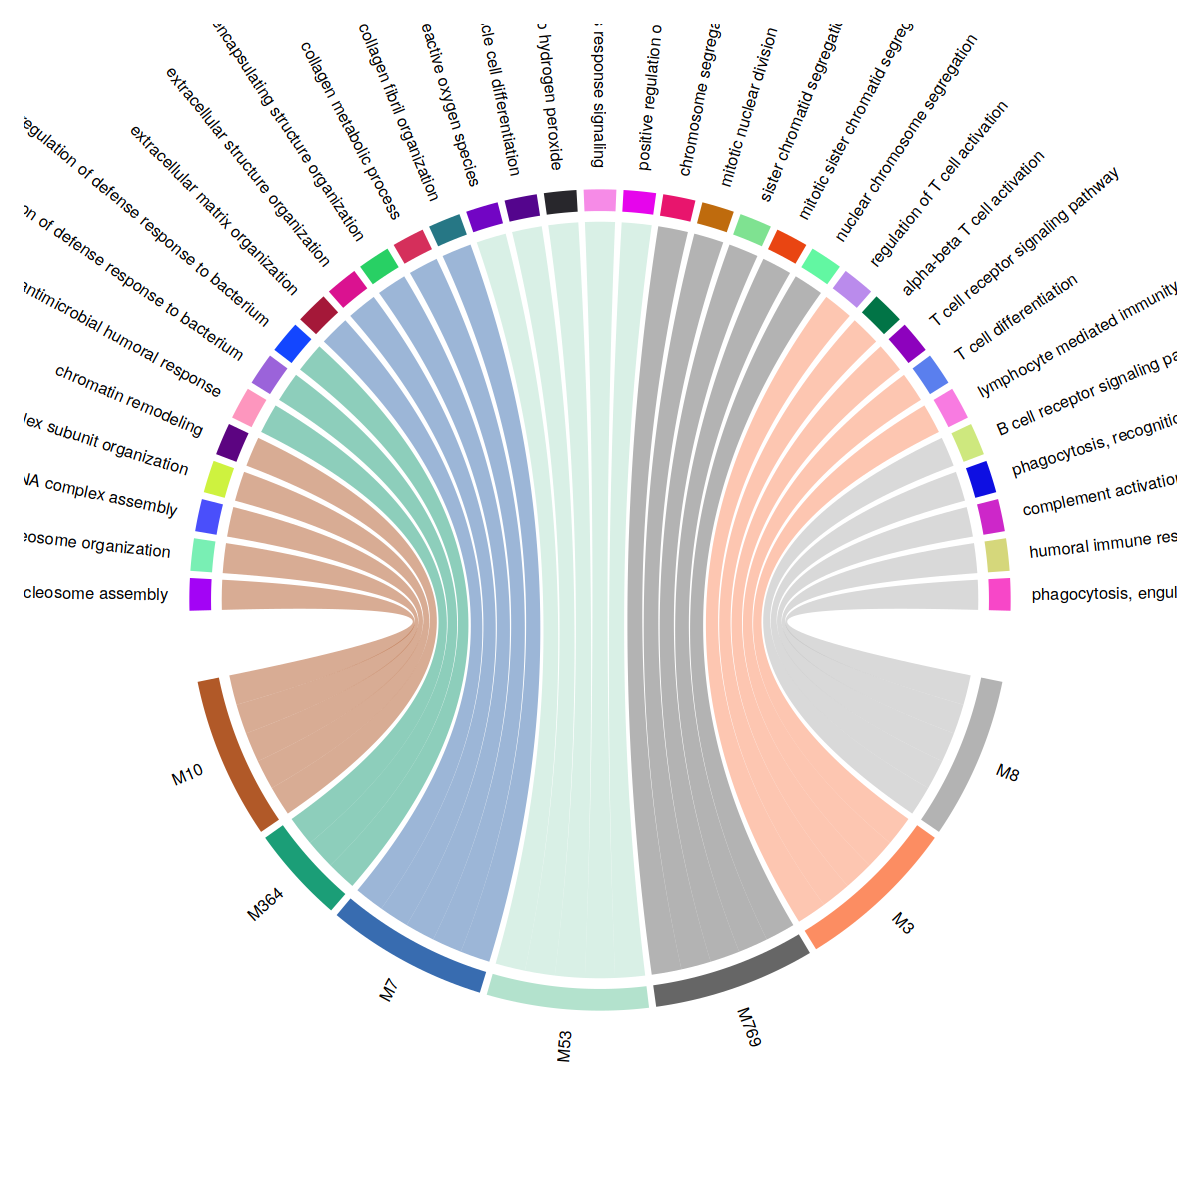

In [63]:
circ_GO <- circ_GO[-which(is.na(circ_GO)),]
chord <- chord_dat(circ_GO)
chord <- chord[nrow(chord):1,]
options(repr.plot.height =10, repr.plot.width = 10)
chordDiagram(chord,annotationTrack = "grid",grid.col = module_col,link.decreasing=F, preAllocateTracks = 1)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise",cex = 0.8, niceFacing = T, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.percentage = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)
circos.clear()

In [64]:
pdf(file = './output/bulk/section_1/2.Module_GOnrichMent_circos.pdf',width = 8,height = 8)
chordDiagram(chord,annotationTrack = "grid",grid.col = module_col, preAllocateTracks = 1)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise",cex = 0.8, niceFacing = TRUE, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.percentage = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)
circos.clear()
dev.off()

png 
  2

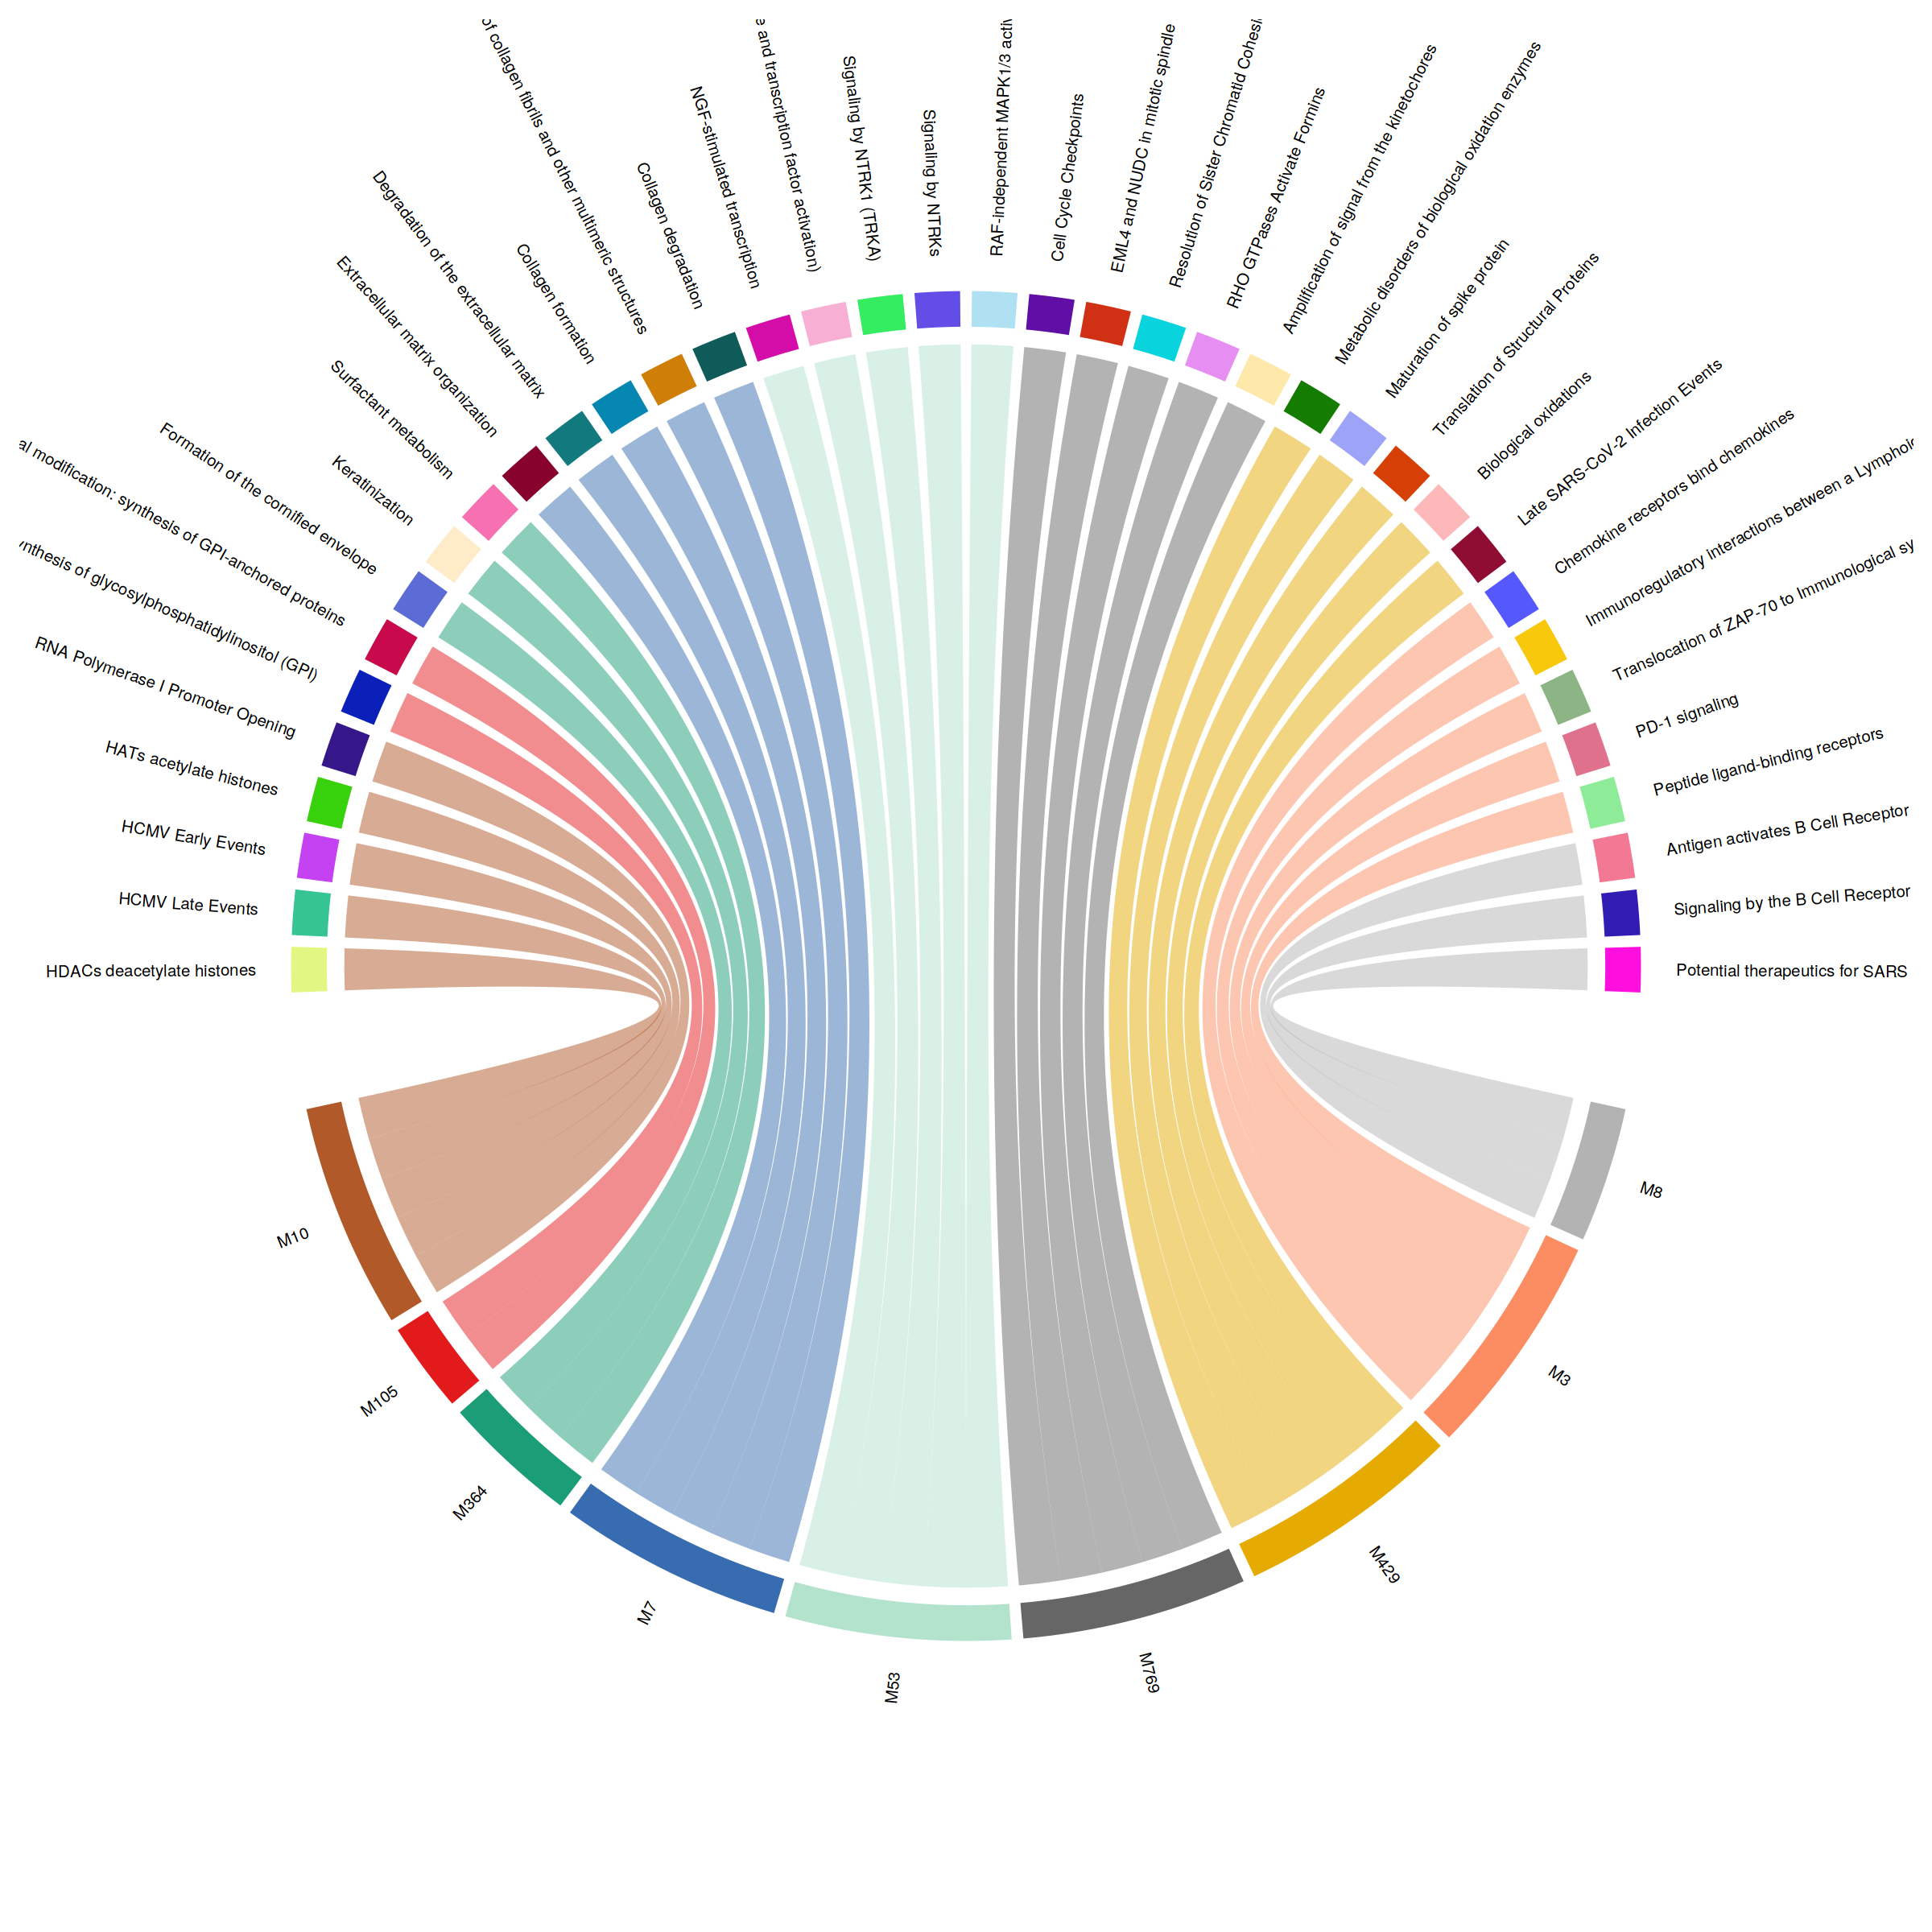

In [65]:
circReactome <- circReactome[-which(is.na(circReactome)),]
chord <- chord_dat(circReactome)
chord <- chord[nrow(chord):1,]
options(repr.plot.height =20, repr.plot.width = 20)
chordDiagram(chord,annotationTrack = "grid",grid.col = module_col,link.decreasing=F, preAllocateTracks = 1)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise",cex = 1, niceFacing = T, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.percentage = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)
circos.clear()

In [66]:
pdf(file = './output/bulk/section_1/2.Module_ReactomenrichMent_circos.pdf',width = 8,height = 8)
chordDiagram(chord,annotationTrack = "grid",grid.col = module_col, preAllocateTracks = 1)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise",cex = 0.8, niceFacing = TRUE, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.percentage = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)
circos.clear()
dev.off()

png 
  2

# MsigDB

In [68]:
library(GSVA)
library(msigdbr)
msigDB_H <- msigdbr(species = "Homo sapiens",category = 'H') %>% dplyr::select(gs_name,human_entrez_gene, gene_symbol)
msigDB_H <- unique.data.frame(msigDB_H)
msigDB_H_list <- split(msigDB_H$human_entrez_gene,f = msigDB_H$gs_name)

In [79]:
HM_enrich_list <- lapply(module_gene_listID_sub,FUN =enricher, TERM2GENE=msigDB_H)

HM_enrich_list_top <- lapply(names(HM_enrich_list),function(x){
    if(is.null(HM_enrich_list[[x]])|| dim(HM_enrich_list[[x]])[1]<=1){
        return(NULL)
    }else{
    res <- subset(HM_enrich_list[[x]]@result,p.adjust<0.01)
    if(!is.null(res)){
        res$module <- x
    }
    return(res)
    }

})
HM_enrich <- do.call(rbind,HM_enrich_list_top)
HM_enrich <- subset(HM_enrich,p.adjust<0.001)

--> No gene can be mapped....

--> Expected input gene ID: 91624,81,9962,2769,9948,51478

--> return NULL...



In [80]:
HMselect <- HM_enrich$ID
HM_enrich_list_top <- lapply(names(HM_enrich_list),function(x){
    if(is.null(HM_enrich_list[[x]])|| dim(HM_enrich_list[[x]])[1]<=1){
        return(NULL)
    }else{
    res <- subset(HM_enrich_list[[x]]@result,p.adjust<0.05)
    if(!is.null(res)){
        res$module <- x
    }
    return(res)
    }

})
HM_enrich <- do.call(rbind,HM_enrich_list_top)
HM_enrich <- subset(HM_enrich,ID%in%HMselect)

In [81]:
HM_enrich

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,module
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,82/211,200/4383,2.211675e-60,9.067866e-59,7.449852e-59,1277/1281/1289/1278/3624/8038/1290/2191/2335/1292/1301/2200/131578/7058/1009/6591/4060/1634/1842/1893/10631/1293/7057/4015/59/50509/5396/633/3491/5054/3678/1307/115908/800/4017/6678/26585/10085/5118/50863/5376/1490/6387/6876/1303/4323/4907/10398/4313/4148/25878/2006/1311/4837/4312/10272/7857/10409/2619/3371/1809/2697/3909/10516/1647/7168/7424/3918/7431/4016/1462/6424/7412/7078/56937/64175/6695/6382/7169/8076/7052/7070,82,M7
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,20/211,200/4383,1.310556e-03,8.029106e-03,6.596442e-03,3624/3976/9242/3491/5054/9945/5328/8877/3371/23764/10769/650/57007/3914/1647/1906/7130/56937/2152/80176,20,M7
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,18/211,200/4383,7.051881e-03,3.212523e-02,2.639300e-02,1289/1634/4015/633/3491/5054/284119/857/1490/23764/54206/57007/56925/302/55076/2152/11015/7052,18,M7
HALLMARK_TNFA_SIGNALING_VIA_NFKB1,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,28/29,200/4383,1.205111e-37,3.253800e-36,2.156515e-36,1958/2353/1843/2354/3164/1960/1959/9592/467/3725/1316/9021/4616/1839/3569/7832/9314/1847/3726/1844/8013/8061/5187/8870/7538/23645/388/6446,28,M53
HALLMARK_HYPOXIA1,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,9/29,200/4383,3.241542e-06,4.178992e-05,2.769702e-05,2353/1843/467/3725/1316/3569/8870/7538/23645,9,M53
HALLMARK_UV_RESPONSE_UP,HALLMARK_UV_RESPONSE_UP,HALLMARK_UV_RESPONSE_UP,8/29,158/4383,5.378172e-06,4.178992e-05,2.769702e-05,2353/2354/3164/467/3569/7832/3726/388,8,M53
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,8/29,161/4383,6.191099e-06,4.178992e-05,2.769702e-05,1960/467/3725/4616/3569/7832/8870/388,8,M53
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,8/29,200/4383,3.063765e-05,1.654433e-04,1.096505e-04,2353/467/3725/1839/7832/9314/8870/23645,8,M53
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,18/30,200/4383,1.846238e-17,2.215486e-16,1.554727e-16,9055/991/11004/7468/9493/24137/10403/993/4288/3835/6491/23594/3149/5347/55872/10460/23649/4678,18,M769


In [83]:
HM_enrich$ID <- c('EMT','TNFA signaling via NFkB', 'Hypoxia',
                  'TNFA signaling via NFkB','Hypoxia','UV response up',
                  'Apoptosis','P53 pathway','G2M checkpoint',
                  'E2F targets','Mitotic spindle','allograft rejection',
                  'IL2 STAT5 signaling','IL2 STAT5 signaling','allograft rejection')
HM_enrich$ID <- factor(x = HM_enrich$ID,levels = HM_enrich$ID,labels = HM_enrich$ID)
HM_enrich$score <- -log10(HM_enrich$p.adjust)

In [85]:
library(ggradar)
library(reshape2) 
library(reshape) 


Attaching package: ‘reshape’


The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast


The following objects are masked from ‘package:S4Vectors’:

    expand, rename


The following object is masked from ‘package:clusterProfiler’:

    rename




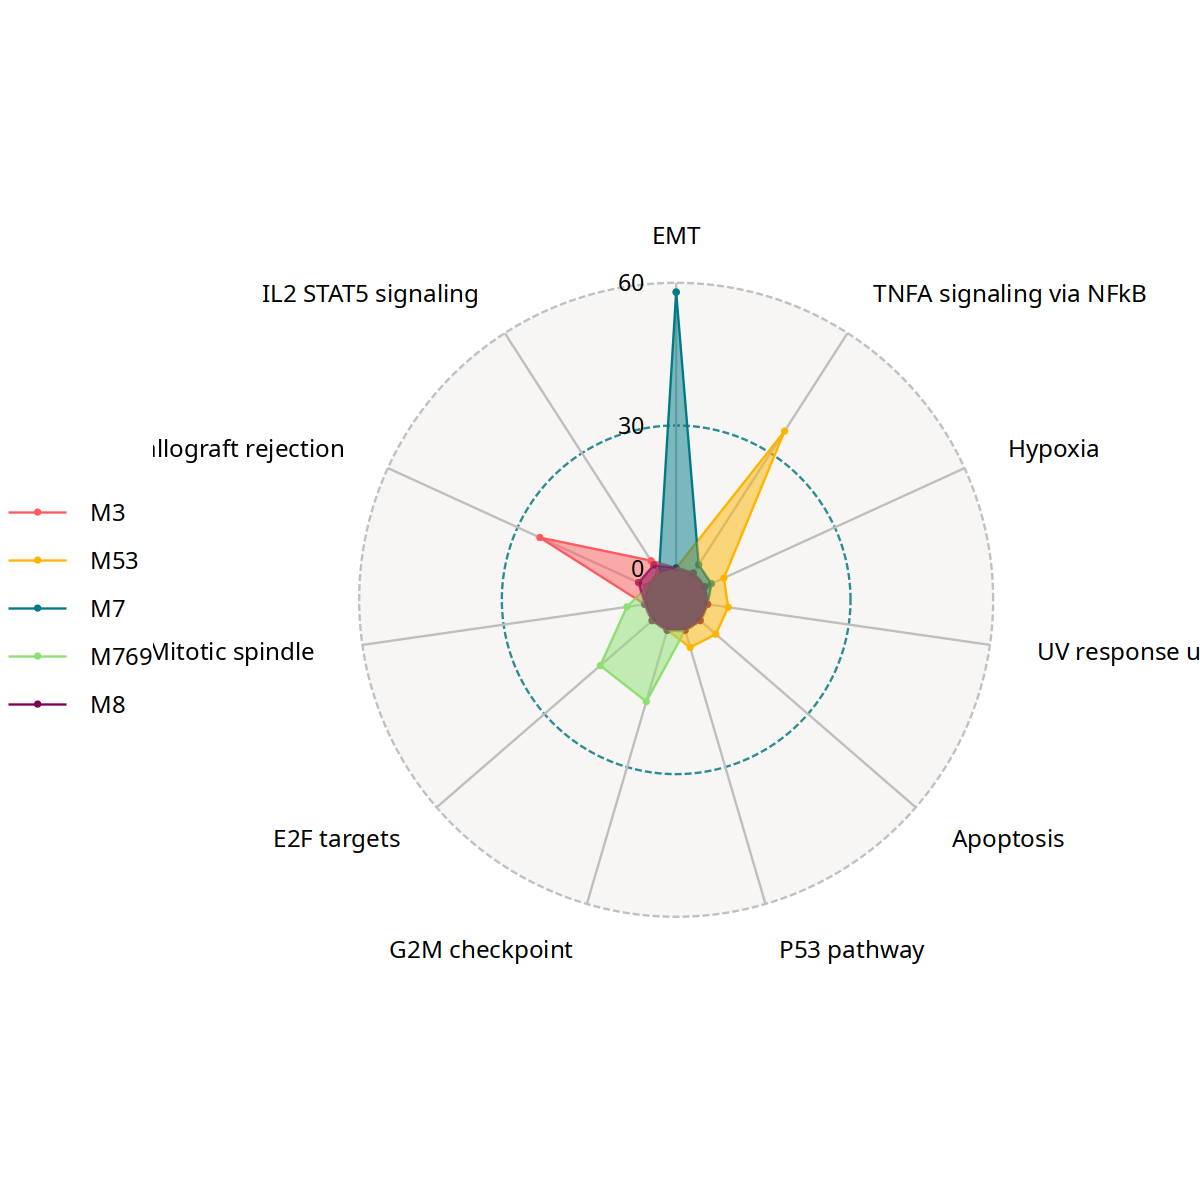

In [87]:
radar_HM <- as.data.frame(cast(data = HM_enrich,module~ID,add.missing = 0,value = 'score',fill = 0))
colnames(radar_HM)[1] <- 'group'
HMenrich_radar <- ggradar(radar_HM,base.size = 1,grid.max = 60,grid.mid = 30,values.radar = c("0", "30", "60"),fill = T,group.line.width = 0.5,group.point.size = 1)
options(repr.plot.height =10, repr.plot.width = 10)
HMenrich_radar

In [88]:
pdf(file = './output/bulk/section_1/2.Module_HallMarkerEnrichMent_ggradar.pdf',width = 8,height = 8)
print(HMenrich_radar)
dev.off()

png 
  2